## **Exploração e análise de dados de crédito.**

**Os dados:**

Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

* idade = idade do cliente

* sexo = sexo do cliente (F ou M)

* dependentes = número de dependentes do cliente

* escolaridade = nível de escolaridade do clientes

* salario_anual = faixa salarial do cliente

* tipo_cartao = tipo de cartao do cliente

* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses

* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses

* meses_inativo_12m = quantidade de meses que o cliente ficou inativo

* limite_credito = limite de credito do cliente

* valor_transacoes_12m = valor das transações dos ultimos 12 meses

* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses


A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

# **Exploração de dados:**

Como primeira etapa, vamos explorar e entender o que temos de dados.

**Qual a quantidade de informações na nossa base de dados?**

**Query**: SELECT count(*) FROM credito;


> Resposta: 2564 linhas


**ps**: A base de dados do link acima contém mais linhas do que a seleção utilizada.



**Como são os dados:**

**Query**: SELECT * FROM credito LIMIT 10;

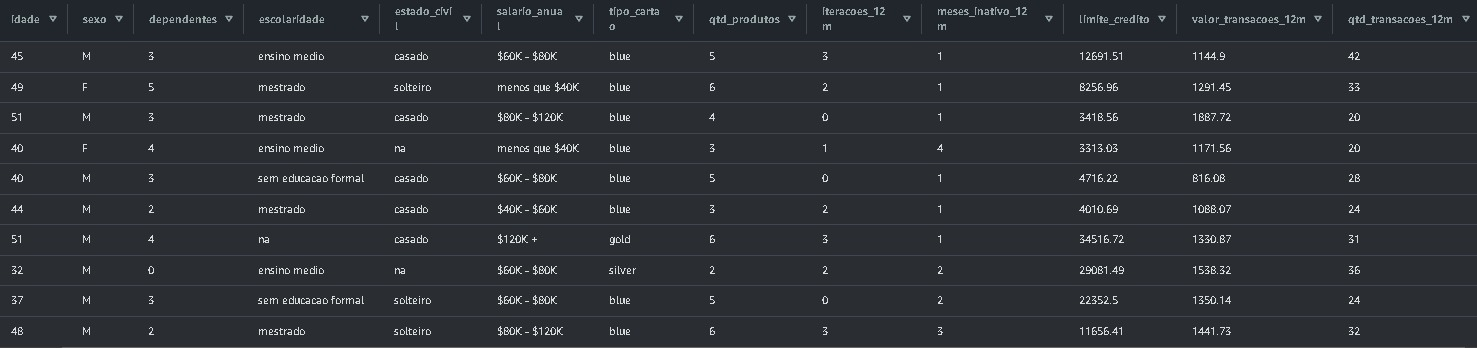

> É possível observar valores nulos na tabela (na), vamos analisar mais detalhadamente os valores dessa coluna.

**Quais os tipos de cada dado:**

**Query**: DESCRIBE credito;

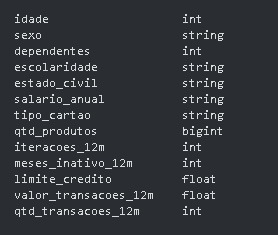

> Agora que temos as informações dos tipos de dados, vamos observar melhor as variáveis que não são numéricas.

**Quais são os tipos de escolaridade disponíveis no dataset?**

**Query**: SELECT DISTINCT escolaridade FROM credito;

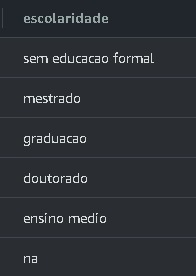

> Os dados incluem os níveis de escolaridade, e é possível observar a presença de valores nulos no dataset(na). Trataremos disso mais tarde!


Será que temos mais valores nulos?

**Quais são os tipos de estado_civil disponíveis no dataset?**

**Query**: SELECT DISTINCT estado_civil FROM credito;

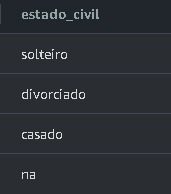



> E novamente vemos valores nulos nos dados de estado civil.



**Quais são os tipos de salario_anual disponíveis no dataset?**

**Query**: SELECT DISTINCT salario_anual FROM credito;

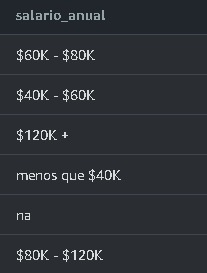

> Os salários no dataset não estão expostos com os valores que o cliente ganha. Informa a faixa salarial de cada um, e também contém dados nulos.

**Quais são os tipos de cartão disponíveis no dataset?**

**Query**: SELECT DISTINCT tipo_carao FROM credito;

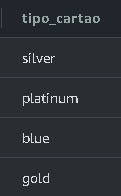

> Aqui, observamos que não há necessidade de lidar com valores nulos.

# **Análise de dados**

Com os dados explorados e entendidas as informações que temos em nosso banco de dados, podemos analisar as informações e buscar entender o que está acontecendo no banco de dados. Vamos fazer a seguinte pergunta: **"Nesse banco de dados, quantos clientes temos em cada faixa salarial?"**


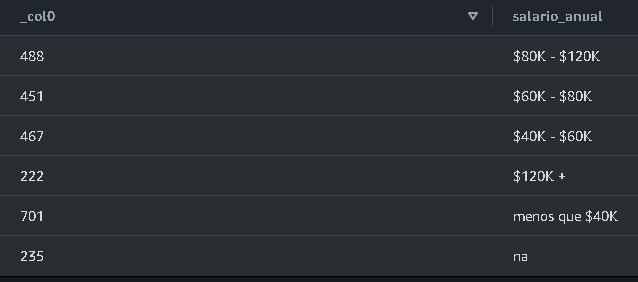


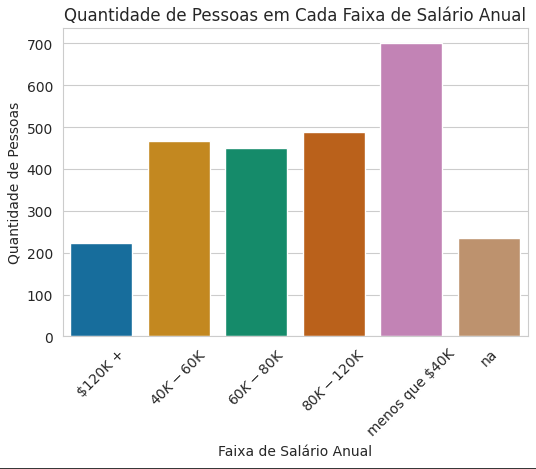

> A maioria dos clientes dessa base de dados possui uma renda menor que 40K. Além disso, existem 235 clientes cujas faixas salariais não foram informadas ou registradas. De certa forma, pode ser interessante para a empresa focar no público com renda mais baixa.

**Nesse banco de dados, quantos clientes são homens e quantos são mulheres?**

**Query**: SELECT count(*), sexo FROM credito GROUP BY sexo;

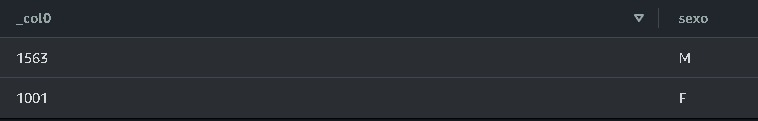


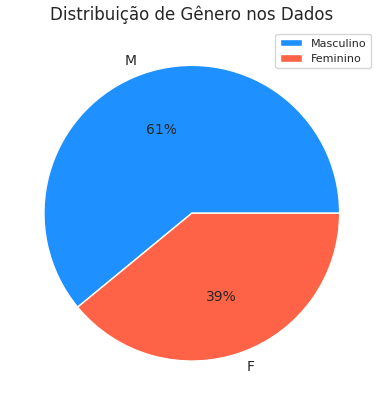

> A maioria dos clientes deste banco é do sexo masculino! A partir do arquivo CSV extraído dos dados, é possível gerar um gráfico de pizza para visualizar melhor a proporção entre homens e mulheres.

**Para direcionar adequadamente o nosso marketing para os clientes, qual é a faixa etária predominante?**

**Query**: SELECT AVG(idade) AS media_idade, MIN(idade) AS min_idade, MAX(idade) AS max_idade, sexo FROM credito GROUP BY sexo;

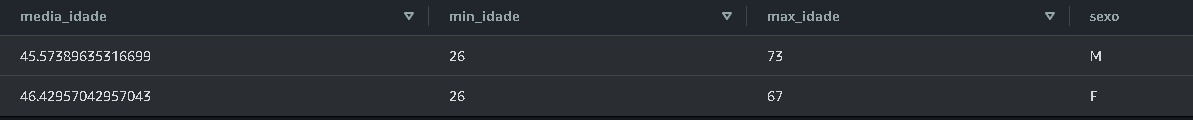

> Através dessa análise, não foi possível extrair nenhuma informação relevante. A menor idade entre os dois sexos é a mesma e a média é muito similar. A única diferença é a idade máxima, o que é quase irrelevante, considerando que a diferença não é muito significativa.

**Qual a maior e a menor transação dos clientes?**

**Query**: SELECT MIN(valor_transacoes_12m) AS transacao_minima, MAX(valor_transacoes_12m) AS transacao_minima FROM credito;

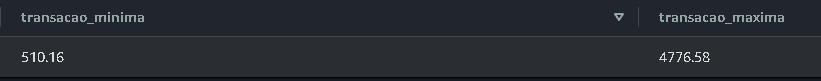

> Nesse banco de dados temos que a soma de transações em 12 meses variam de 510.16 a 5776.58.

**Quais são as características dos clientes que possuem os maiores limites de crédito?**

**Query**: SELECT MAX(limite_credito) AS limite_credito, escolaridade, tipo_cartao, sexo FROM credito WHERE escolaridade != 'na' and tipo_cartao !='na' GROUP BY escolaridade, tipo_cartao, sexo ORDER BY limite_credito DESC LIMIT 10;

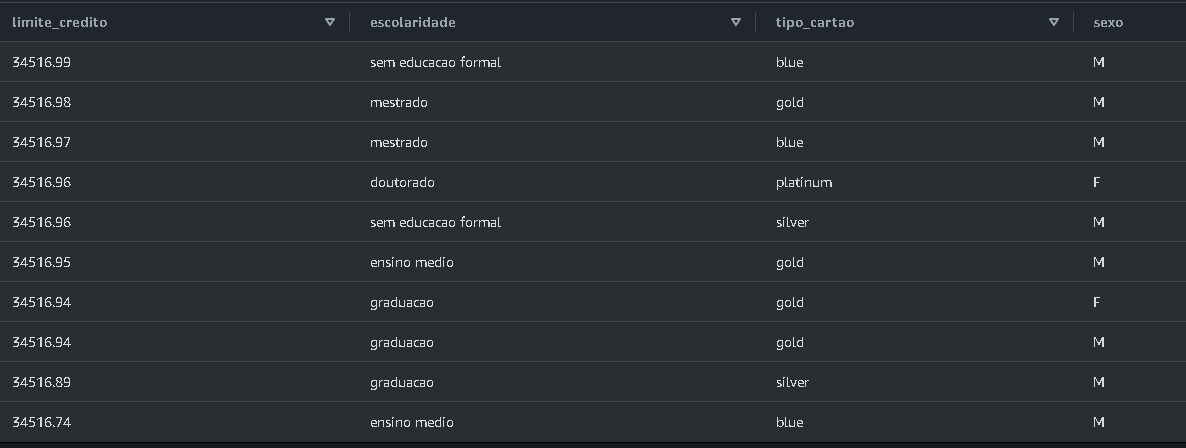

> Parece não haver um impacto da escolaridade no limite. O cliente com o limite mais alto é um homem sem educação formal. O tipo de cartão não parece estar relacionado à escolaridade nem ao limite. Além disso, entre os clientes com os maiores limites, encontram-se os que possuem cartões gold, silver, platinum e blue.



**Quais são as características dos clientes que possuem os menores limites de crédito?**

**Query**: SELECT MAX(limite_credito) AS limite_credito, escolaridade, tipo_cartao, sexo FROM credito WHERE escolaridade !='na' and tipo_cartao !='na', GROUP BY escolaridade, tipo_cartao, sexo ORDER BY limite_credito ASC;

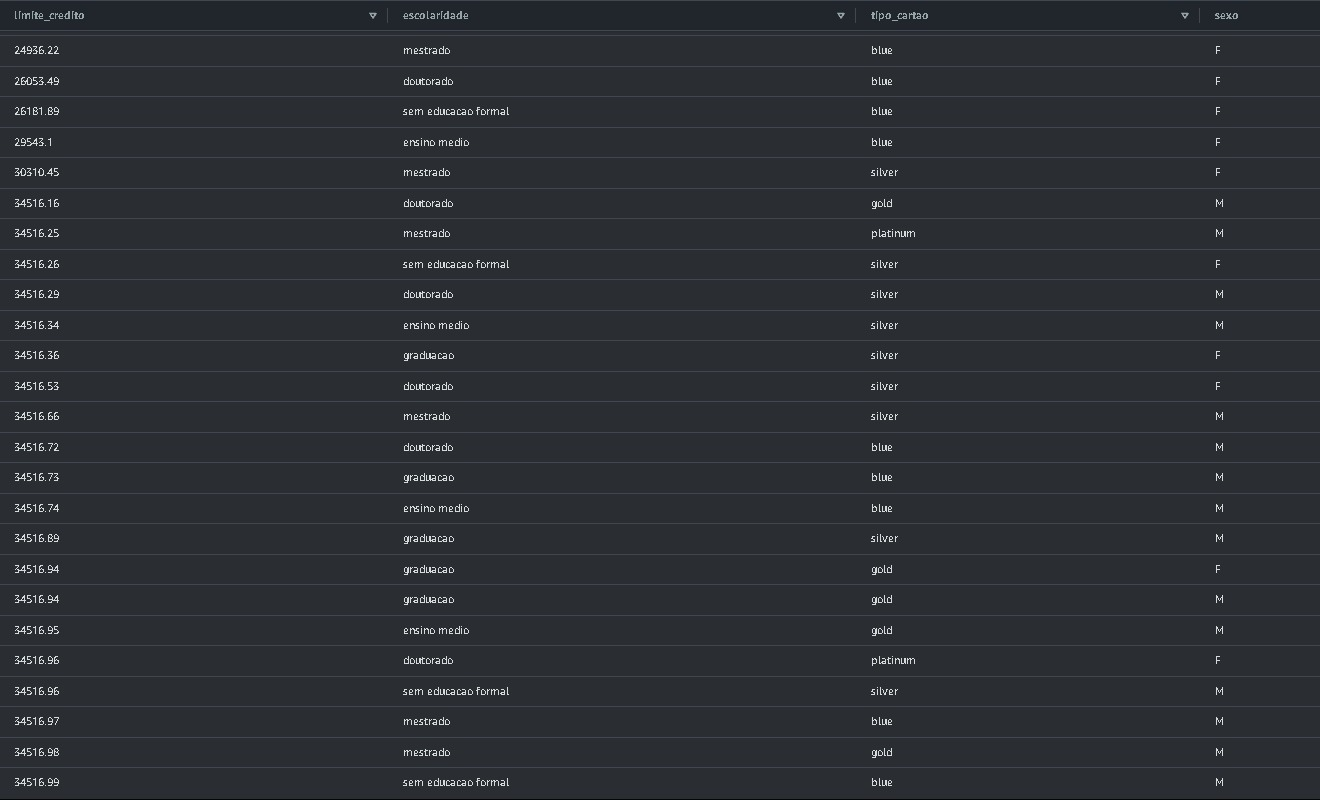


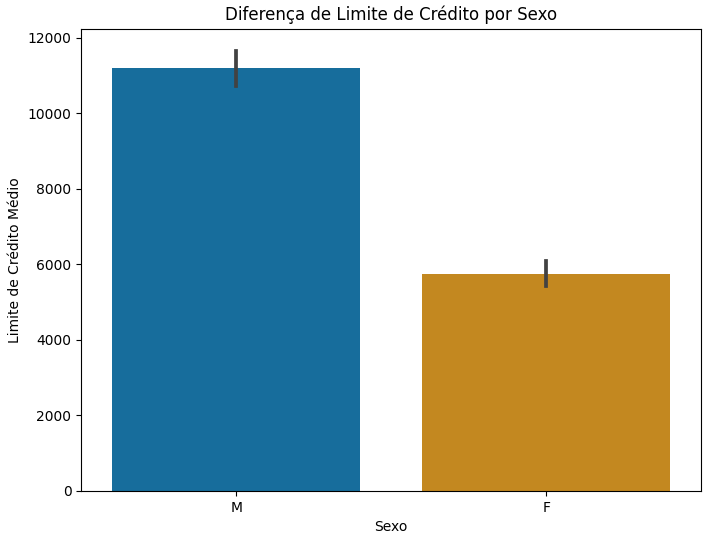



> Dessa vez, é possível perceber que não há clientes com cartão platinum entre os de menores limites. Também é perceptível que a maioria dos clientes com menores limites são mulheres, enquanto nos maiores limites, os homens predominam, até ultrapassando a média total de limite de crédito

**Será que as mulheres gastam mais do que os homens**

**Query**: SELECT MAX(valor_transacoes_12m) AS maior_valor_gasto, AVG(valor_trasacoes_12m) AS media_valor_gasto, MIN(valor_trasacoes_12m) AS min_valor_gasto, sexo FROM credito GROUP BY sexo;

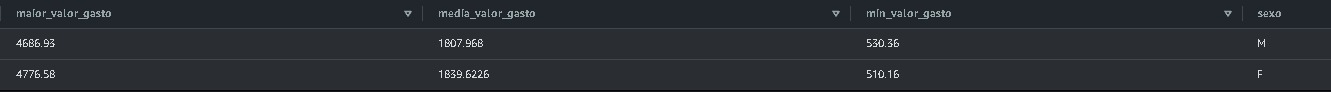

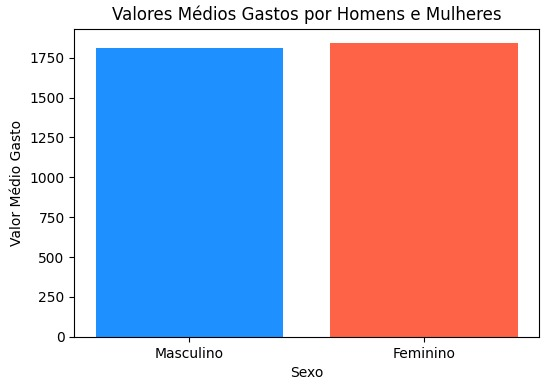

> Mesmo com a diferença nos limites, os gastos entre os dois sexos são similares!

**O salário impacta no limite?**

**Query**: SELECT AVG(qtd_produtos) AS qts_produtos, AVG(valor_transacoes_12m) AS media_valor_transacoes, AVG(limite_credito) AS media_limite, sexo, salario_anual FROM credito WHERE salario_anual !='na' GROUP BY sexo, salario_anual ORDER BY AVG(valor_transacoes_12m) DESC;

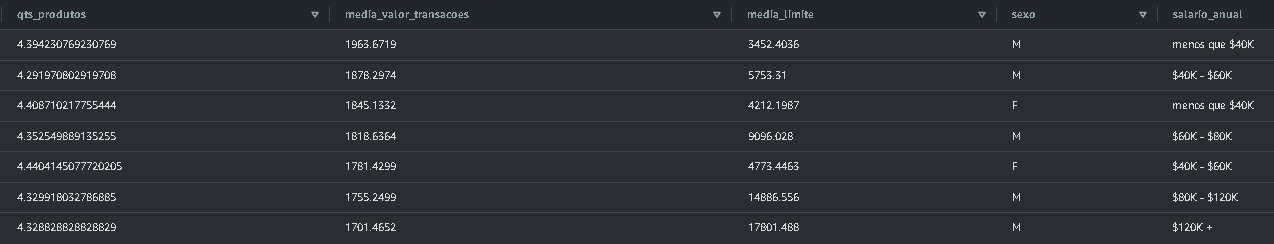

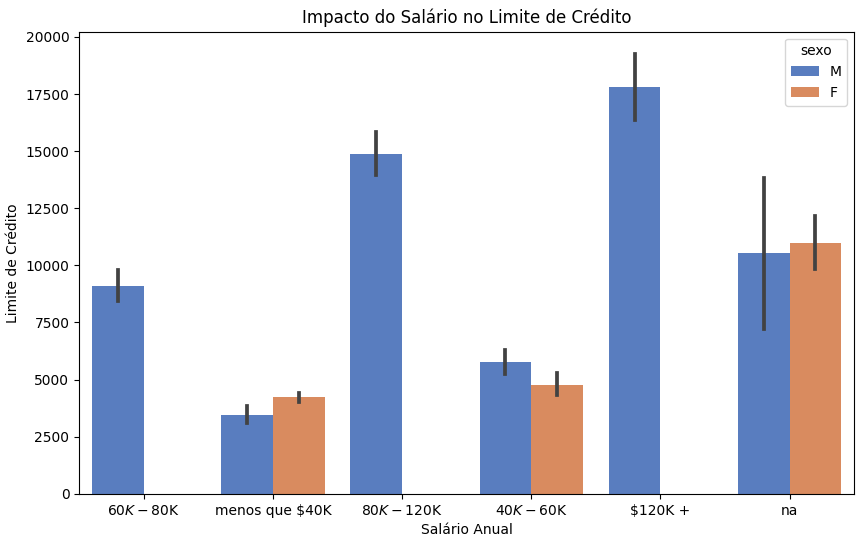

> Pessoas com menor faixa salarial também apresentam menor limite de crédito.


# **Conclusão**

Essas foram algumas análises extraídas do nosso dataset de crédito.

**Insights interessantes:**

- A maior parte dos clientes possui renda de até 40k.
- A maior parte dos clientes é do sexo masculino.
- A escolaridade não apresenta influência no limite nem no tipo do cartão.
- Os clientes com maiores limites são, em grande maioria, homens.
- Os clientes com menores limites são, em sua maioria, mulheres.
- Entre os clientes com os menores limites, não há presença do cartão platinum.
- A faixa salarial impacta diretamente no limite de crédito.
- Não existem clientes do sexo feminino com salário anual acima de 60k.

